# Exploration statistique

In [1]:
%run ./Desu-Step-0-Init.ipynb

# Enrichissement : Ajout des Nutriscores manquants
Seul +- 800 000 / 2 500 000 articles ont un nutriscore
Objectif : Entrainer une Random Forest sur les 800 000 afin de completer le nutriscore des articles où il est manquant 

In [2]:
sql_sub_dtypes = {				  # 'code': 
                                  # 'creator':
                                  # 'product_name':
                                  # 'brands_tags':
                                  # 'categories':
                                  # 'categories_tags':
                                  # 'categories_en':
                                  # 'ingredients_tags':
                                    'nbr_ingredients':np.float64,
                                  # 'additives_tags':
                                    'score_additifs':np.float64,
                                  #  'nbr_additifs':np.int32,
                                  #  'tox_moy_additifs':np.float64,	
                                    'nutriscore_score':np.float64,
                                    'ecoscore_score':np.float64,
                                  #  'main_category':
                                    'energy_kj_100g':np.float64,
                                    'energy_kcal_100g':np.float64,
                                    'energy_100g':np.float64,
                                    'energy_from_fat_100g':np.float64,
                                    'fat_100g':np.float64,
                                    'saturated_fat_100g':np.float64,
                                    'butyric_acid_100g':np.float64,
                                    'caproic_acid_100g':np.float64,
                                    'caprylic_acid_100g':np.float64,
                                    'capric_acid_100g':np.float64,
                                    'lauric_acid_100g':np.float64,
                                    'myristic_acid_100g':np.float64,
                                    'palmitic_acid_100g':np.float64,
                                    'stearic_acid_100g':np.float64,
                                    'arachidic_acid_100g':np.float64,
                                    'behenic_acid_100g':np.float64,
                                    'lignoceric_acid_100g':np.float64,
                                    'cerotic_acid_100g':np.float64,
                                    'montanic_acid_100g':np.float64,
                                    'melissic_acid_100g':np.float64,
                                    'monounsaturated_fat_100g':np.float64,
                                    'polyunsaturated_fat_100g':np.float64,
                                    'omega_3_fat_100g':np.float64,
                                    'alpha_linolenic_acid_100g':np.float64,
                                    'eicosapentaenoic_acid_100g':np.float64,
                                    'docosahexaenoic_acid_100g':np.float64,
                                    'omega_6_fat_100g':np.float64,
                                    'linoleic_acid_100g':np.float64,
                                    'arachidonic_acid_100g':np.float64,
                                    'gamma_linolenic_acid_100g':np.float64,
                                    'dihomo_gamma_linolenic_acid_100g':np.float64,
                                    'omega_9_fat_100g':np.float64,
                                    'oleic_acid_100g':np.float64,
                                    'elaidic_acid_100g':np.float64,
                                    'gondoic_acid_100g':np.float64,
                                    'mead_acid_100g':np.float64,
                                    'erucic_acid_100g':np.float64,
                                    'nervonic_acid_100g':np.float64,
                                    'trans_fat_100g':np.float64,
                                    'cholesterol_100g':np.float64,
                                    'carbohydrates_100g':np.float64,
                                    'sugars_100g':np.float64,
                                    'sucrose_100g':np.float64,
                                    'glucose_100g':np.float64,
                                    'fructose_100g':np.float64,
                                    'lactose_100g':np.float64,
                                    'maltose_100g':np.float64,
                                    'maltodextrins_100g':np.float64,
                                    'starch_100g':np.float64,
                                    'polyols_100g':np.float64,
                                    'fiber_100g':np.float64,
                                    'soluble_fiber_100g':np.float64,
                                    'insoluble_fiber_100g':np.float64,
                                    'proteins_100g':np.float64,
                                    'casein_100g':np.float64,
                                    'serum_proteins_100g':np.float64,
                                    'nucleotides_100g':np.float64,
                                    'salt_100g':np.float64,
                                    'sodium_100g':np.float64,
                                    'alcohol_100g':np.float64,
                                    'vitamin_a_100g':np.float64,
                                    'beta_carotene_100g':np.float64,
                                    'vitamin_d_100g':np.float64,
                                    'vitamin_e_100g':np.float64,
                                    'vitamin_k_100g':np.float64,
                                    'vitamin_c_100g':np.float64,
                                    'vitamin_b1_100g':np.float64,
                                    'vitamin_b2_100g':np.float64,
                                    'vitamin_pp_100g':np.float64,
                                    'vitamin_b6_100g':np.float64,
                                    'vitamin_b9_100g':np.float64,
                                    'folates_100g':np.float64,
                                    'vitamin_b12_100g':np.float64,
                                    'biotin_100g':np.float64,
                                    'pantothenic_acid_100g':np.float64,
                                    'silica_100g':np.float64,
                                    'bicarbonate_100g':np.float64,
                                    'potassium_100g':np.float64,
                                    'chloride_100g':np.float64,
                                    'calcium_100g':np.float64,
                                    'phosphorus_100g':np.float64,
                                    'iron_100g':np.float64,
                                    'magnesium_100g':np.float64,
                                    'zinc_100g':np.float64,
                                    'copper_100g':np.float64,
                                    'manganese_100g':np.float64,
                                    'fluoride_100g':np.float64,
                                    'selenium_100g':np.float64,
                                    'chromium_100g':np.float64,
                                    'molybdenum_100g':np.float64,
                                    'iodine_100g':np.float64,
                                    'caffeine_100g':np.float64,
                                    'taurine_100g':np.float64,
                                    'ph_100g':np.float64,
                                    'fruits_vegetables_nuts_100g':np.float64,
                                    'fruits_vegetables_nuts_dried_100g':np.float64,
                                    'fruits_vegetables_nuts_estimate_100g':np.float64,
                                    'fruits_vegetables_nuts_estimate_from_ingredients_100g':np.float64,
                                    'collagen_meat_protein_ratio_100g':np.float64,
                                    'cocoa_100g':np.float64,
                                    'chlorophyl_100g':np.float64,
                                    'carbon_footprint_100g':np.float64,
                                    'carbon_footprint_from_meat_or_fish_100g':np.float64,
                                    'nutrition_score_fr_100g':np.float64,
                                    'nutrition_score_uk_100g':np.float64,
                                    'glycemic_index_100g':np.float64,
                                    'water_hardness_100g':np.float64,
                                    'choline_100g':np.float64,
                                    'phylloquinone_100g':np.float64,
                                    'beta_glucan_100g':np.float64,
                                    'inositol_100g':np.float64,
                                    'carnitine_100g':np.float64}

In [3]:
debug ("Debut chargement subset openfood fact")
df_food_sub = pd.read_sql_query    ('select '+
                                  # 'code,'+
                                  # 'creator,'+
                                  # 'product_name,'+
                                  # 'brands_tags,'+
                                  # 'categories,'+
                                  # 'categories_tags,'+
                                  # 'categories_en,'+
                                  # 'ingredients_tags,'+
                                    'nbr_ingredients,'+
                                  #  'additives_tags,'+
                                    'score_additifs,'+
                                  #  'nbr_additifs,'+
                                  #  'tox_moy_additifs,'+	
                                    'nutriscore_score,'+
                                    'ecoscore_score,'+
                                  #  'main_category,'+
                                    'energy_kj_100g,'+
                                    'energy_kcal_100g,'+
                                    'energy_100g,'+
                                    'energy_from_fat_100g,'+
                                    'fat_100g,'+
                                    'saturated_fat_100g,'+
                                    'butyric_acid_100g,'+
                                    'caproic_acid_100g,'+
                                    'caprylic_acid_100g,'+
                                    'capric_acid_100g,'+
                                    'lauric_acid_100g,'+
                                    'myristic_acid_100g,'+
                                    'palmitic_acid_100g,'+
                                    'stearic_acid_100g,'+
                                    'arachidic_acid_100g,'+
                                    'behenic_acid_100g,'+
                                    'lignoceric_acid_100g,'+
                                    'cerotic_acid_100g,'+
                                    'montanic_acid_100g,'+
                                    'melissic_acid_100g,'+
                                    'monounsaturated_fat_100g,'+
                                    'polyunsaturated_fat_100g,'+
                                    'omega_3_fat_100g,'+
                                    'alpha_linolenic_acid_100g,'+
                                    'eicosapentaenoic_acid_100g,'+
                                    'docosahexaenoic_acid_100g,'+
                                    'omega_6_fat_100g,'+
                                    'linoleic_acid_100g,'+
                                    'arachidonic_acid_100g,'+
                                    'gamma_linolenic_acid_100g,'+
                                    'dihomo_gamma_linolenic_acid_100g,'+
                                    'omega_9_fat_100g,'+
                                    'oleic_acid_100g,'+
                                    'elaidic_acid_100g,'+
                                    'gondoic_acid_100g,'+
                                    'mead_acid_100g,'+
                                    'erucic_acid_100g,'+
                                    'nervonic_acid_100g,'+
                                    'trans_fat_100g,'+
                                    'cholesterol_100g,'+
                                    'carbohydrates_100g,'+
                                    'sugars_100g,'+
                                    'sucrose_100g,'+
                                    'glucose_100g,'+
                                    'fructose_100g,'+
                                    'lactose_100g,'+
                                    'maltose_100g,'+
                                    'maltodextrins_100g,'+
                                    'starch_100g,'+
                                    'polyols_100g,'+
                                    'fiber_100g,'+
                                    'soluble_fiber_100g,'+
                                    'insoluble_fiber_100g,'+
                                    'proteins_100g,'+
                                    'casein_100g,'+
                                    'serum_proteins_100g,'+
                                    'nucleotides_100g,'+
                                    'salt_100g,'+
                                    'sodium_100g,'+
                                    'alcohol_100g,'+
                                    'vitamin_a_100g,'+
                                    'beta_carotene_100g,'+
                                    'vitamin_d_100g,'+
                                    'vitamin_e_100g,'+
                                    'vitamin_k_100g,'+
                                    'vitamin_c_100g,'+
                                    'vitamin_b1_100g,'+
                                    'vitamin_b2_100g,'+
                                    'vitamin_pp_100g,'+
                                    'vitamin_b6_100g,'+
                                    'vitamin_b9_100g,'+
                                    'folates_100g,'+
                                    'vitamin_b12_100g,'+
                                    'biotin_100g,'+
                                    'pantothenic_acid_100g,'+
                                    'silica_100g,'+
                                    'bicarbonate_100g,'+
                                    'potassium_100g,'+
                                    'chloride_100g,'+
                                    'calcium_100g,'+
                                    'phosphorus_100g,'+
                                    'iron_100g,'+
                                    'magnesium_100g,'+
                                    'zinc_100g,'+
                                    'copper_100g,'+
                                    'manganese_100g,'+
                                    'fluoride_100g,'+
                                    'selenium_100g,'+
                                    'chromium_100g,'+
                                    'molybdenum_100g,'+
                                    'iodine_100g,'+
                                    'caffeine_100g,'+
                                    'taurine_100g,'+
                                    'ph_100g,'+
                                    'fruits_vegetables_nuts_100g,'+
                                    'fruits_vegetables_nuts_dried_100g,'+
                                    'fruits_vegetables_nuts_estimate_100g,'+
                                    'fruits_vegetables_nuts_estimate_from_ingredients_100g,'+
                                    'collagen_meat_protein_ratio_100g,'+
                                    'cocoa_100g,'+
                                    'chlorophyl_100g,'+
                                    'carbon_footprint_100g,'+
                                    'carbon_footprint_from_meat_or_fish_100g,'+
                                    'nutrition_score_fr_100g,'+
                                    'nutrition_score_uk_100g,'+
                                    'glycemic_index_100g,'+
                                    'water_hardness_100g,'+
                                    'choline_100g,'+
                                    'phylloquinone_100g,'+
                                    'beta_glucan_100g,'+
                                    'inositol_100g,'+
                                    'carnitine_100g'+
                                    ' from desu.food where nutriscore_score !="nan" ',db,dtype = sql_sub_dtypes)

debug("Taille du dataframe après chargement:"+str(round(df_food_sub.memory_usage().sum() / (1024**2),1))+"Mo") #converting to megabyte
debug ("shape du dataframe :"+str(df_food_sub.shape))

# debug("Remplacement des nan par la valeur 0")
# df_food_sub.replace(['nan'],0)


df_food_sub.head(10)

2022-06-05 21:29:24 Debug -> Debut chargement subset openfood fact
2022-06-05 21:34:26 Debug -> Taille du dataframe après chargement:692.6Mo
2022-06-05 21:34:26 Debug -> shape du dataframe :(782567, 116)


,nbr_ingredients,score_additifs,nutriscore_score,ecoscore_score,energy_kj_100g,energy_kcal_100g,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,fruits_vegetables_nuts_dried_100g,fruits_vegetables_nuts_estimate_100g,fruits_vegetables_nuts_estimate_from_ingredients_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
0,3.0,NaN,18.0,55.0,936.0,NaN,936.0,NaN,8.2,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.1,NaN,NaN,NaN,4.600,1.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,78.0,NaN,32.0,134.0,NaN,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,0.420,0.1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,14.0,NaN,NaN,381.0,1594.0,NaN,22.0,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.3,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,4.6,NaN,NaN,NaN,0.100,0.0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-2.0,76.0,NaN,157.0,657.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,0.6,NaN,NaN,NaN,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,69.0,NaN,143.0

In [23]:
df_food_sub.describe()

,nbr_ingredients,score_additifs,nutriscore_score,ecoscore_score,energy_kj_100g,energy_kcal_100g,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,fruits_vegetables_nuts_dried_100g,fruits_vegetables_nuts_estimate_100g,fruits_vegetables_nuts_estimate_from_ingredients_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
count,523770.000000,313396.000000,782567.000000,398660.000000,1.368250e+05,7.434090e+05,7.803890e+05,857.000000,7.803520e+05,780299.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41259.000000,41207.000000,1946.000000,0.0,0.0,0.0,465.000000,0.0,0.0,0.0,0.0,96.000000,0.0,0.0,0.0,0.0,0.0,0.0,231242.000000,235602.000000,780056.000000,780328.000000,0.0,0.0,0.0,0.0,0.0,0.0,513.000000,2887.000000,431598.000000,3417.000000,3185.000000,780347.000000,8.000000,51.000000,27.000000,780749.000000,780749.000000,1.403300e+04,184645.000000,56.000000,8.428000e+03,2914.000000,801.000000,188388.000000,19987.000000,19514.000000,19433.000000,12314.000000,8899.000000,7294.000000,9.809000e+03,717.000000,4347.000000,169.000000,451.000000,80676.000000,621.000000,238711.000000,11639.000000,233029.000000,12391.000000,8407.000000,3651.000000,3314.000000,239.000000,1816.000000,130.000000,257.000000,1666.000000,400.000000,150.000000,234.000000,8601.000000,819.000000,11368.000000,524006.000000,272.000000,6356.000000,3.000000,377.000000,9976.000000,782567.000000,2.00000,4.000000,2.000000,14.000000,1483.000000,40.000000,22.000000,3.000000
mean,25.328192,8.147783,9.090496,42.243163,1.718025e+03,2.904516e+02,1.312578e+03,306.291599,1.281484e+12,5.886428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.742351,5.305329,5.678379,NaN,NaN,NaN,13.880230,NaN,NaN,NaN,NaN,24.558665,NaN,NaN,NaN,NaN,NaN,NaN,0.070742,0.046336,28.722981,12.675138,NaN,NaN,NaN,NaN,NaN,NaN,27.267654,24.204018,3.093188,2.346588,4.245009,8.629949,250.115420,31.962385,22.772913,1.473015,0.589225,4.758776e+04,0.564624,0.758818,1.134228e-01,0.723824,0.387577,0.032285,0.744711,0.099239,0.469381,0.359988,0.899238,0.035541,8.273102e-02,0.961887,0.546827,1.030571,1.371783,0.604855,0.994803,0.239061,1.049328,0.012653,0.474705,0.097038,0.015771,0.012291,0.074728,1.497970,512.962736,2.938221,2.525839,2.377299,72.666104,6.705842,35.078726,16.701685,46.451498,9.267420,

In [15]:
df = df_food_sub.sample(n=3,replace=True)

# Estimation des temps d'entrainement
présuppose la linéarité en fonction de la taille n du dataset

In [22]:
x_plt = []
y_plt = []

param_grid_rf = {'max_depth': range(2,5), # profondeur
                 'min_samples_split': [2,4], #,6,8,10], # nombre de y minimum pour tenter une subdivision
                 'max_features':np.linspace(0.1,1,8) #Fraction de variables à chaque noeud choisi aléatoirement
             }

rf_class = RFC(random_state=0)  #On laisse 100 arbres pour ne pas faire exploser le tps 
#de calcul

grid_search_rf = GridSearchCV(rf_class, # le modèle
                          param_grid_rf, # la grille de paramètres 
                          scoring = "accuracy", # le KPI de scoring
                          return_train_score=True,
                          cv = 2,n_jobs=7,verbose=1) # j'ai mis 8, c'est pê un peu extrême # cv = kfold de cross validation
#sur les machines AMU...

for size in range(100,1000,100) :
    debug ("Début d'entrainement avec {s} lignes ".format(s=size))
  
    df=df_food_sub.sample (n=size,replace = True)
    y = df_food_sub["nutriscore_score"]
    X = df_food_sub.drop("nutriscore_score",axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) # 
    
    ts = datetime.datetime.now()
  
    grid_search_rf.fit(X_train, y_train) # cross-validation sur toutes les combinaisons d'hyperparamètres
    et = (datetime.datetime.now()-ts).total_seconds()
    
    x_plt.append(size)
    y_plt.append(et)
    
    debug ("Fin d'entrainement avec {s} lignes : temps d'execution : {t} ".format(s=size,t=et))

    

2022-06-05 22:04:13 Debug -> Début d'entrainement avec 100 lignes 
Fitting 2 folds for each of 48 candidates, totalling 96 fits


C:\Users\gille\anaconda3\envs\desu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gille\anaconda3\envs\desu\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gille\anaconda3\envs\desu\lib\site-packages\sklearn\ensemble\_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "C:\Users\gille\anaconda3\envs\desu\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = ch

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<function matplotlib.pyplot.show(close=None, block=None)>

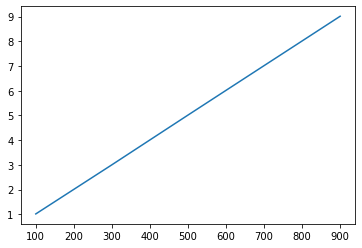

In [19]:
plt.plot (np.array(x_plt),np.array(y_plt))
plt.show

In [10]:
print (exec_time)

[(100, 1.000484), (200, 2.015405)]


# Preparation jeu de train / split

In [14]:
# y = df_food_sub["nutriscore_score"]
# X = df_food_sub.drop("nutriscore_score",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) # 

In [19]:
# on crée une grille de paramètres
param_grid_rf = {'max_depth': range(2,10), # profondeur
                 'min_samples_split': [2,4,6,8,10], # nombre de y minimum pour tenter une subdivision
                 'max_features':np.linspace(0.1,1,8) #Fraction de variables à chaque noeud choisi aléatoirement
             }

rf_class = RFC(random_state=0)  #On laisse 100 arbres pour ne pas faire exploser le tps 
#de calcul

grid_search_rf = GridSearchCV(rf_class, # le modèle
                          param_grid_rf, # la grille de paramètres 
                          scoring = "accuracy", # le KPI de scoring
                          return_train_score=True,
                          cv = 0,n_jobs=7,verbose=1) # j'ai mis 8, c'est pê un peu extrême # cv = kfold de cross validation
#sur les machines AMU...

In [ ]:
debug ("Debut d'entrainement")
grid_search_rf.fit(X_train, y_train) # cross-validation sur toutes les combinaisons d'hyperparamètres

Wall time: 0 ns
Fitting 4 folds for each of 520 candidates, totalling 2080 fits


C:\Users\gille\anaconda3\envs\desu\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  UserWarning,
C:\Users\gille\anaconda3\envs\desu\lib\site-packages\joblib\externals\loky\process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
